<a href="https://colab.research.google.com/github/Hanbi-Kim/Git-Test/blob/main/AutoEncoder_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 라이브러리 로드
import numpy as np
import pandas as pd
import keras
from keras import layers
from matplotlib import pyplot as plt

In [ ]:
# 데이터 로드 (깃허브에 올려서 로드했습니다.. 만약에 코랩에서 다른 데이터 로드해서 하시려면 업로드하고 경로를 여기에 쓰시면 됩니다.)
df = pd.read_csv("https://raw.githubusercontent.com/Hanbi-Kim/Git-Test/main/health_data_with_header_2.csv")

In [ ]:
# 로드된 데이터 앞 5개 확인
df.head(5)

,age,trestbps,chol,thalach,oldpeak,ca,sex,cp,fbs,restecg,exang,slope,thal,num
0,39,138,220,152,0.0,0,0,3,0,0,0,2,3,0
1,60,150,240,171,0.9,0,0,1,0,0,0,1,3,0
2,69,140,239,151,1.8,2,0,1,0,0,0,1,3,0
3,58,120,284,160,1.8,0,1,2,0,2,0,2,3,1
4,47,130,253,179,0.0,0,1,3,0,0,0,1,3,0


In [ ]:
# 불러온 데이터 기초통계량 확인
df.describe()

,age,trestbps,chol,thalach,oldpeak,ca,sex,cp,fbs,restecg,exang,slope,thal,num
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,131.693603,247.350168,149.599327,1.055556,0.676768,0.676768,3.158249,0.144781,0.996633,0.326599,1.602694,4.730640,0.461279
std,9.049736,17.762806,51.997583,22.941562,1.166123,0.938965,0.468500,0.964859,0.352474,0.994914,0.469761,0.618187,1.938629,0.499340
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000
25%,48.000000,120.000000,211.000000,133.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000
50%,56.000000,130.000000,243.000000,153.000000,0.800000,0.000000,1.000000,3.000000,0.000000,1.000000,0.000000,2.000000,3.000000,0.000000
75%,61.000000,140.000000,276.000000,166.000000,1.600000,1.000000,1.000000,4.000000,0.000000,2.000000,1.000000,2.000000,7.000000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000,1.000000,4.000000,1.000000,2.000000,1.000000,3.000000,7.000000,1.000000


In [ ]:
# num == 1인 데이터는 비정상 데이터임으로 df_abnormal에 할당
df_abnormal = df[df['num'] ==  1]

In [ ]:
# num == 0인 데이터는 정상 데이터임으로 df_normal에 할당
df_normal = df[df['num'] ==  0]

In [ ]:
# df_normal 데이터를 훈련과 테스트용으로 95:5 비율로 나눔
from sklearn.model_selection import train_test_split
X_train, X_test_normal, y_train, y_test = train_test_split(df_normal.drop('num',axis=1), df_normal['num'],
                                                    test_size=0.20, random_state=42)

In [ ]:
# SMOTE를 하기 위해 정상 데이터 샘플을 9:1로 나눔
X_train['Smote'] = np.ones(int(len(X_train) * 0.9)).tolist() + np.zeros(len(X_train) - int(len(X_train) * 0.9)).tolist()

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train, y = oversample.fit_resample(X_train.drop("Smote",axis=1), X_train['Smote'])

In [ ]:
# 훈련에 사용할 데이터
X_train.head(5)

,age,trestbps,chol,thalach,oldpeak,ca,sex,cp,fbs,restecg,exang,slope,thal
0,56,140,294,153,1.3,0,0,2,0,2,0,2,3
1,51,94,227,154,0.0,1,1,3,0,0,1,1,7
2,69,140,239,151,1.8,2,0,1,0,0,0,1,3
3,71,110,265,130,0.0,1,0,3,1,2,0,1,3
4,46,105,204,172,0.0,0,0,2,0,0,0,1,3


In [ ]:
# 테스트에 사용할 정상 데이터
X_test_normal.head(5)

,age,trestbps,chol,thalach,oldpeak,ca,sex,cp,fbs,restecg,exang,slope,thal
209,52,108,233,147,0.1,3,1,4,1,0,0,1,7
215,65,140,417,157,0.8,1,0,3,1,2,0,1,3
265,54,140,239,160,1.2,0,1,4,0,0,0,1,3
124,48,122,222,186,0.0,0,1,4,0,2,0,1,3
193,48,124,255,175,0.0,2,1,3,1,0,0,1,3


In [ ]:
model = keras.Sequential(
    [
        layers.Input(shape= X_train.shape[1]),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(8, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(X_train.shape[1], activation='relu')
    ]
)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 64)                896       
                                                                 
 dense_25 (Dense)            (None, 32)                2080      
                                                                 
 dense_26 (Dense)            (None, 8)                 264       
                                                                 
 dense_27 (Dense)            (None, 32)                288       
                                                                 
 dense_28 (Dense)            (None, 64)                2112      
                                                                 
 dense_29 (Dense)            (None, 13)                845       
                                                                 
Total params: 6485 (25.33 KB)
Trainable params: 6485 (

In [ ]:
history = model.fit(
    X_train,
    X_train,
    epochs=5000,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, mode="min"),
        keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=4, min_lr=0.000001)
    ],
)

Epoch 1/5000
2/2 [==============================] - 2s 471ms/step - loss: 8170.9614 - val_loss: 8056.5952 - lr: 0.0010
Epoch 2/5000
2/2 [==============================] - 0s 66ms/step - loss: 8028.8091 - val_loss: 7898.1782 - lr: 0.0010
Epoch 3/5000
2/2 [==============================] - 0s 66ms/step - loss: 7863.1245 - val_loss: 7708.4214 - lr: 0.0010
Epoch 4/5000
2/2 [==============================] - 0s 146ms/step - loss: 7671.0679 - val_loss: 7474.5249 - lr: 0.0010
Epoch 5/5000
2/2 [==============================] - 0s 78ms/step - loss: 7422.9927 - val_loss: 7165.2529 - lr: 0.0010
Epoch 6/5000
2/2 [==============================] - 0s 47ms/step - loss: 7096.9409 - val_loss: 6770.3901 - lr: 0.0010
Epoch 7/5000
2/2 [==============================] - 0s 68ms/step - loss: 6680.4072 - val_loss: 6287.5942 - lr: 0.0010
Epoch 8/5000
2/2 [==============================] - 0s 49ms/step - loss: 6179.0654 - val_loss: 5726.4150 - lr: 0.0010
Epoch 9/5000
2/2 [==============================] - 0s

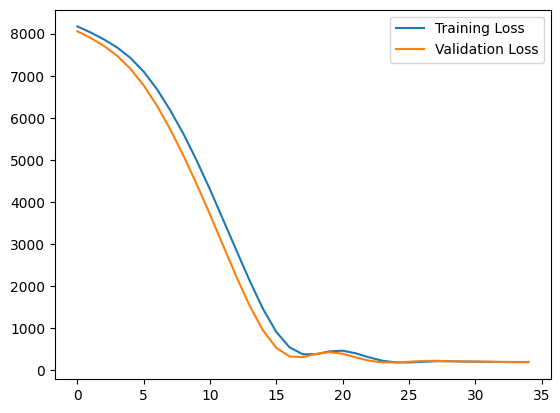

In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

8/8 [==============================] - 0s 2ms/step


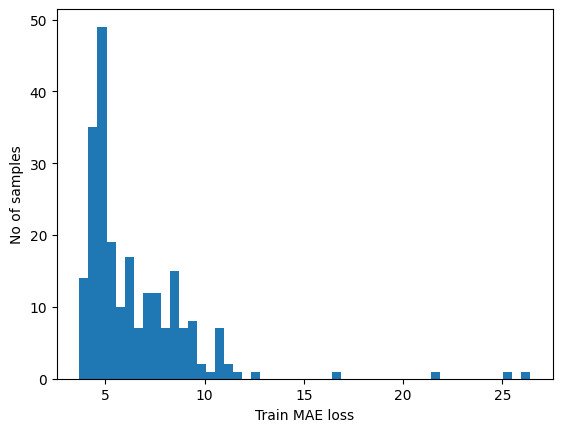

Reconstruction error threshold:  26.410310715895434


In [ ]:
# Get train MAE loss.
X_train_pred = model.predict(X_train)
train_mae_loss = np.mean(np.abs(X_train_pred - X_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

In [ ]:
# 정상 테스트 데이터
X_test_normal

,age,trestbps,chol,thalach,oldpeak,ca,sex,cp,fbs,restecg,exang,slope,thal
209,52,108,233,147,0.1,3,1,4,1,0,0,1,7
215,65,140,417,157,0.8,1,0,3,1,2,0,1,3
265,54,140,239,160,1.2,0,1,4,0,0,0,1,3
124,48,122,222,186,0.0,0,1,4,0,2,0,1,3
193,48,124,255,175,0.0,2,1,3,1,0,0,1,3
68,69,160,234,131,0.1,1,1,1,1,2,0,2,3
201,51,130,256,149,0.5,0,0,3,0,2,0,1,3
119,71,112,149,125,1.6,0,0,4,0,0,0,2,3
200,44,120,263,173,0.0,0,1,2,0,0,0,1,7
266,35,122,192,174,0.0,0,1,2,0,0,0,1,3


In [ ]:
# 정상 테스트 데이터의 예측 값
X_test_normal_pred = pd.DataFrame(model.predict(X_test_normal), columns=X_test_normal.columns)
X_test_normal_pred

1/1 [==============================] - 0s 22ms/step


,age,trestbps,chol,thalach,oldpeak,ca,sex,cp,fbs,restecg,exang,slope,thal
0,36.787563,100.610535,220.462112,142.795303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,54.785622,149.190689,331.000763,214.249298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,39.421886,108.310875,236.628311,153.239822,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,38.787163,106.124741,231.237289,149.835190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,40.716961,111.324760,243.643448,157.827011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,38.871067,107.255516,234.645493,151.882187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,39.587391,108.547302,238.042038,154.134949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,29.754959,81.530579,177.498306,115.010521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,40.812466,111.669212,244.521393,158.379227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,34.811195,95.366531,207.324875,134.350998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 비정상 테스트 데이터
df_abnormal
X_test_abnormal = df_abnormal.drop("num", axis=1)
X_test_abnormal

,age,trestbps,chol,thalach,oldpeak,ca,sex,cp,fbs,restecg,exang,slope,thal
3,58,120,284,160,1.8,0,1,2,0,2,0,2,3
5,50,140,233,163,0.6,1,1,3,0,0,0,2,7
6,61,145,307,146,1.0,0,0,4,0,2,1,2,7
8,70,160,269,112,2.9,1,1,3,0,0,1,2,7
9,66,112,212,132,0.1,1,1,4,0,2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,68,144,193,141,3.4,2,1,4,1,0,0,2,7
289,60,158,305,161,0.0,0,0,4,0,2,0,1,3
291,67,100,299,125,0.9,2,1,4,0,2,1,2,3
292,57,140,241,123,0.2,0,0,4,0,0,1,2,7


In [ ]:
# 정상 테스트 데이터의 예측 값
X_test_abnormal_pred = pd.DataFrame(model.predict(X_test_abnormal), columns=X_test_abnormal.columns)
X_test_abnormal_pred

5/5 [==============================] - 0s 2ms/step


,age,trestbps,chol,thalach,oldpeak,ca,sex,cp,fbs,restecg,exang,slope,thal
0,42.547642,116.080101,255.323425,165.357193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,38.984173,107.285133,233.963394,151.514435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,44.983990,123.432167,271.663422,175.842377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40.611111,112.116806,246.562775,159.522491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,35.048500,95.867622,210.142944,136.106491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,35.602520,98.222534,213.798691,138.448196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133,46.158794,126.739082,278.322754,180.173584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
134,41.457836,112.635628,249.580963,161.601257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
135,37.522350,103.425529,226.792313,146.786102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 최종 결과 Max Threshold 사용

In [ ]:
threshold = np.max(train_mae_loss)

# 비정상 테스트의 MAE를 구하고 앞서구한 threshold보다 낮다면 정상, 높다면 비정상을 Result에 저장
X_test_abnormal['MAE'] = np.mean(np.abs(X_test_abnormal_pred - X_test_abnormal.reset_index(drop=True)), axis=1).tolist()
X_test_abnormal['Result'] = X_test_abnormal['MAE'].apply(lambda x: "Normal" if x< threshold else "Abnomal")
# 정상 테스트의 MAE를 구하고 앞서구한 threshold보다 낮다면 정상, 높다면 비정상을 Result에 저장
X_test_normal['MAE'] = np.mean(np.abs(X_test_normal_pred - X_test_normal.reset_index(drop=True)), axis=1).tolist()
X_test_normal['Result'] = X_test_normal['MAE'].apply(lambda x: "Normal" if x< threshold else "Abnomal")

In [ ]:
# 정상 테스트 8개 중 8개를 정상으로 판단
X_test_normal['Result'].value_counts()

Normal    32
Name: Result, dtype: int64

In [ ]:
# 비정상 테스트 137개 중 137개를 정상으로 판단
X_test_abnormal['Result'].value_counts()

Normal    137
Name: Result, dtype: int64

# 최종 결과 3rd Quantile 사용

In [ ]:
# Get reconstruction loss threshold.
threshold = np.percentile(train_mae_loss,0.75)

In [ ]:
# 정상 테스트의 MAE를 구하고 앞서구한 threshold보다 낮다면 정상, 높다면 비정상을 Result에 저장
X_test_normal['MAE'] = np.mean(np.abs(X_test_normal_pred - X_test_normal.reset_index(drop=True)), axis=1).tolist()
X_test_normal['Result'] = X_test_normal['MAE'].apply(lambda x: "Normal" if x< threshold else "Abnomal")

# 비정상 테스트의 MAE를 구하고 앞서구한 threshold보다 낮다면 정상, 높다면 비정상을 Result에 저장
X_test_abnormal['MAE'] = np.mean(np.abs(X_test_abnormal_pred - X_test_abnormal.reset_index(drop=True)), axis=1).tolist()
X_test_abnormal['Result'] = X_test_abnormal['MAE'].apply(lambda x: "Normal" if x< threshold else "Abnomal")

In [ ]:
# 정상 테스트 8개 중 8개를 정상으로 판단
X_test_normal['Result'].value_counts()

Abnomal    32
Name: Result, dtype: int64

In [ ]:
# 비정상 테스트 137개 중 1 정상으로 136개를 비정상으로 판단
X_test_abnormal['Result'].value_counts()

Abnomal    136
Normal       1
Name: Result, dtype: int64